In [1]:
##1st script /Users/jose/Documents/Python/py_scripts/ClassificationModels.py (select best model)
import pandas as pd
#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier #NN
#Emsemble model
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import warnings

# To ignore all external warnings coming from libraries
warnings.filterwarnings("ignore")

# Load the CSV file as a Pandas DataFrame (file from NHANES database)
data = pd.read_csv('Health_And_Nutrition_BmiClass.csv') #training set

# Divide the DataFrame into features and labels
X = data[['Age', 'Gender', 'Ethnicity', 'Height', 'Weight']] #adapt accordingly: depending on parameters to analyze
y = data['BMI_Code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a list of models
models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('k_neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('svr', SVC()),
    ('mlp_classifier', MLPClassifier()),#NN
    ('linear_regression', LogisticRegression()), ('ridge_regression', RidgeClassifier())
]

# Create an ensemble model with the models
#model = VotingClassifier(models)
# Train the model with the data
#model.fit(X, y)

# Train individual models
for name, model in models:
    #model.fit(X, y)
    model.fit(X_train, y_train)

# Create ensemble models
vc_model = VotingClassifier([(name, model) for name, model in models])
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train ensemble models
#vc_model.fit(X, y)
#rf_model.fit(X, y)
#gb_model.fit(X, y)

# Train multiple ensemble models
vc_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Open the output CSV file for writing
with open('outputClassificationModelsAGEth.csv', 'w') as w:
    # Write the header to the CSV file
    w.write('Index,Age,Gender,Ethnicity,Height,Weight,Bmi_Code,DecisionTree,KNeighbors,SVR,NeuralNetwork,LogisticRegression,RidgeClassifier,Voting,RandomForest,GradientBoosting\n')

    # Initialize a counter for printed values
    printed_count = 0
    
    # Loop through rows in the values.csv file
    #for index, row in data.iterrows(): #whole original dataset
    for index, row in X_test.iterrows(): #testing output size
        #col = row[['Index', 'Ethnicity', 'Height', 'Weight', 'BMI_Code']]
        #Index, eth, height, weight, bmiC = col  # Unpack values from the row. Adapt accordingly: depending on parameters to analyze
        age, gender, eth, height, weight, bmiC = row['Age'], row['Gender'], row['Ethnicity'], row['Height'], row['Weight'], y_test[index]

    # Make predictions with the models
        Bmi1 = models[0][1].predict([[age, gender, eth, height, weight]])
        Bmi2 = models[1][1].predict([[age, gender, eth, height, weight]])
        Bmi3 = models[2][1].predict([[age, gender, eth, height, weight]])
        Bmi4 = models[3][1].predict([[age, gender, eth, height, weight]])
        Bmi5 = models[4][1].predict([[age, gender, eth, height, weight]])
        Bmi6 = models[5][1].predict([[age, gender, eth, height, weight]])
    
        #ensemblers predictions
        Bmi_predicha_vc = vc_model.predict([[age, gender, eth, height, weight]])
        Bmi_predicha_rf = rf_model.predict([[age, gender, eth, height, weight]])
        Bmi_predicha_gb = gb_model.predict([[age, gender, eth, height, weight]])

        # Write all the results to the CSV file
        w.write(f'{index},{age},{gender},{eth},{height},{weight},{bmiC},{Bmi1[0]},{Bmi3[0]},{Bmi4[0]},{Bmi5[0]},{Bmi2[0]},{Bmi6[0]},{Bmi_predicha_vc[0]},{Bmi_predicha_rf[0]},{Bmi_predicha_gb[0]}\n')

        # Increment the counter
        printed_count += 1
        
        # Print the results if the condition is met, short list
        if printed_count <= 10:
        # Print the results
            print(f'{index},{age},{gender},{eth},{bmiC},DecisionTree {Bmi1[0]},'
              f'KNeighbors {Bmi3[0]},SupportVector {Bmi4[0]},NeuralNetwork {Bmi5[0]},'
              f'LinearRegression {Bmi2[0]},RidgeRegression {Bmi6[0]},Voting {Bmi_predicha_vc[0]}, RandomForest {Bmi_predicha_rf[0]}, GradientBoosting {Bmi_predicha_gb[0]}')

5436,66.0,2.0,5.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
5102,43.0,1.0,5.0,1,DecisionTree 1,KNeighbors 1,SupportVector 1,NeuralNetwork 1,LinearRegression 1,RidgeRegression 0,Voting 1, RandomForest 1, GradientBoosting 1
3694,48.0,2.0,4.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
1499,41.0,1.0,1.0,0,DecisionTree 0,KNeighbors 0,SupportVector 0,NeuralNetwork 0,LinearRegression 0,RidgeRegression 0,Voting 0, RandomForest 0, GradientBoosting 0
2698,76.0,1.0,1.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
4108,35.0,2.0,1.0,2,DecisionTree 2,KNeighbors 2,SupportVector 2,NeuralNetwork 2,LinearRegression 2,RidgeRegression 2,Voting 2, RandomForest 2, GradientBoosting 2
1032,25.0,1.0,3.0,2,Decision

In [2]:
##2nd script /Users/jose/Documents/Python/py_scripts/GraphStats.py (produce graphs and stats: MAE,MSE,RMSE,R-squared)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Read data from input file
input_file = 'outputClassificationModelsAGEth.csv'  # Replace with your actual file path
df = pd.read_csv(input_file)  # Assuming tab-separated data

# Assuming df is your DataFrame with model difference columns
#for best models and ensemblers
columns_to_compare = ['DecisionTree', 'KNeighbors', 'SVR', 'NeuralNetwork', 'LogisticRegression', 'RidgeClassifier', 'Voting', 'RandomForest', 'GradientBoosting']

# Statistics
mae_values = {model: mean_absolute_error(df['Bmi_Code'], df[model]) for model in columns_to_compare}
mse_values = {model: mean_squared_error(df['Bmi_Code'], df[model]) for model in columns_to_compare}
rmse_values = {model: mean_squared_error(df['Bmi_Code'], df[model], squared=False) for model in columns_to_compare}
r2_values = {model: r2_score(df['Bmi_Code'], df[model]) for model in columns_to_compare}

# Print and write statistics to output file
output_file = 'StatsClassificationModelsAGEth.csv'  # Replace with your desired output file path
with open(output_file, 'w') as w:
    w.write('Model,MAE,MSE,RMSE,R-squared\n')
    for model in columns_to_compare:
        w.write(f'{model},{mae_values[model]:.4f},{mse_values[model]:.4f},{rmse_values[model]:.4f},{r2_values[model]:.4f}\n')

# Display statistics
    print('Model\t\tMAE\t\tMSE\t\tRMSE\t\tR-squared')
    for model in columns_to_compare:
        print(f'{model}\t{mae_values[model]:.4f}\t{mse_values[model]:.4f}\t{rmse_values[model]:.4f}\t{r2_values[model]:.4f}')

Model		MAE		MSE		RMSE		R-squared
DecisionTree	0.0317	0.0353	0.1878	0.9483
KNeighbors	0.0406	0.0406	0.2014	0.9406
SVR	0.1023	0.1023	0.3198	0.8502
NeuralNetwork	0.1252	0.1252	0.3539	0.8166
LogisticRegression	0.0476	0.0476	0.2182	0.9302
RidgeClassifier	0.2540	0.2540	0.5040	0.6280
Voting	0.0423	0.0423	0.2057	0.9380
RandomForest	0.0353	0.0353	0.1878	0.9483
GradientBoosting	0.0317	0.0317	0.1782	0.9535


In [3]:
##3rd script /Users/jose/Documents/Python/py_scripts/APRF1metrics.py (produce graphs and stats: Accuracy,Precision,Recall,F1-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize empty lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Evaluate classification metrics for each model
for model in columns_to_compare:
    # Choose an appropriate threshold based on your data characteristics
    threshold = 0.5  # Adjust this threshold, e.g., 0.0 for any positive difference

    y_true = (df['Bmi_Code'] >= 25).astype(int)
    y_pred = (df[model] >= threshold).astype(int)

    # Calculate classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Print and write metrics to output file
output_file = 'StatsClassificationModelsAGEth2.csv'  # Replace with your desired output file path
with open(output_file, 'w') as w:
    w.write('Model,Accuracy,Precision,Recall,F1-score\n')
    for i, model in enumerate(columns_to_compare):
        w.write(f'{model},{accuracy_list[i]:.4f},{precision_list[i]:.4f},{recall_list[i]:.4f},{f1_list[i]:.4f}\n')

# Display metrics
print('Model\tAccuracy\tPrecision\tRecall\tF1-score')
for i, model in enumerate(columns_to_compare):
    print(f'{model}\t{accuracy_list[i]:.4f}\t{precision_list[i]:.4f}\t{recall_list[i]:.4f}\t{f1_list[i]:.4f}')

Model	Accuracy	Precision	Recall	F1-score
DecisionTree	0.2593	1.0000	0.2593	0.4118
KNeighbors	0.2557	1.0000	0.2557	0.4073
SVR	0.2610	1.0000	0.2610	0.4140
NeuralNetwork	0.2698	1.0000	0.2698	0.4250
LogisticRegression	0.2593	1.0000	0.2593	0.4118
RidgeClassifier	0.3404	1.0000	0.3404	0.5079
Voting	0.2698	1.0000	0.2698	0.4250
RandomForest	0.2593	1.0000	0.2593	0.4118
GradientBoosting	0.2540	1.0000	0.2540	0.4051


In [4]:
##4th script /Users/jose/Documents/Python/py_scripts/Classification_report.py (extra stats: Accuracy,Precision,Recall,F1-score)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
        
# Evaluate classification metrics for each model
for model in columns_to_compare:
    # Choose an appropriate threshold based on your data characteristics
    threshold = 0.5  # Adjust this threshold, e.g., 0.0 for any positive difference

    y_true = df['Bmi_Code']
    y_pred = (df[model] >= threshold).astype(int)

    # Print confusion matrix and classification report
    classification_result = classification_report(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
        
    print(f'Classification Report for {model}:', classification_result)
    print(f'{model} Accuracy:', accuracy)

        # Print and write metrics to output file
    output_file = 'StatsClassificationModelsAGEth3.csv'  # Replace with your desired output file path
    with open(output_file, 'a') as w:
    # Print and write metrics to output file
        w.write(f'{model}, Accuracy: {accuracy:.4f}\n')

Classification Report for DecisionTree:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         9
           0       0.90      0.97      0.94       137
           1       0.46      0.97      0.63       199
           2       0.00      0.00      0.00       222

    accuracy                           0.58       567
   macro avg       0.34      0.49      0.39       567
weighted avg       0.38      0.58      0.45       567

DecisionTree Accuracy: 0.5767195767195767
Classification Report for KNeighbors:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         9
           0       0.92      0.98      0.95       137
           1       0.47      0.99      0.63       199
           2       0.00      0.00      0.00       222

    accuracy                           0.58       567
   macro avg       0.35      0.49      0.40       567
weighted avg       0.39      0.58      0.45       567

KNeighbors

In [5]:
#Optional, merging outputs into single file
import glob
file_pattern = 'StatsClassificationModelsAGEth*.csv'
output_file = 'StatsClassificationModelsAGEth_combined.csv'

with open(output_file, 'w') as output:
    for filename in glob.glob(file_pattern):
        with open(filename, 'r') as input_file:
            output.write(input_file.read())

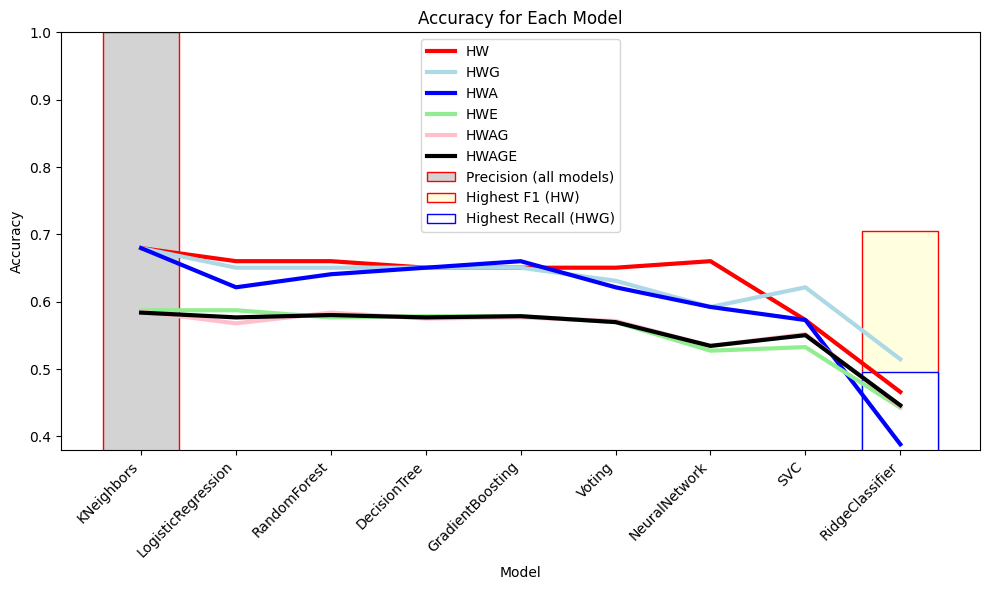

In [7]:
#create graphical representation after manually creating the input matrix below from the outputs files/screen
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    'Model': ['KNeighbors', 'LogisticRegression', 'RandomForest', 'DecisionTree', 'GradientBoosting', 'Voting', 'NeuralNetwork', 'SVC', 'RidgeClassifier'],
    'Accuracy HW': [0.6796, 0.6602, 0.6602, 0.6505, 0.6505, 0.6505, 0.6602, 0.5728, 0.466],
    'Accuracy HWA': [0.6796, 0.6214, 0.6408, 0.6505, 0.6602, 0.6214, 0.5922, 0.5728, 0.3883],
    'Accuracy HWG': [0.6796, 0.6505, 0.6505, 0.6505, 0.6505, 0.6311, 0.5922, 0.6214, 0.5146],
    'Accuracy HWE': [0.5873, 0.5873, 0.5767, 0.5785, 0.5785, 0.5697, 0.5273, 0.5326, 0.4427],
    'Accuracy AG': [0.5855, 0.5679, 0.5838, 0.575, 0.5767, 0.5714, 0.5344, 0.552, 0.4444],
    'Accuracy HWAGE': [0.5838, 0.5767, 0.5802, 0.5767, 0.5785, 0.5697, 0.5344, 0.5503, 0.4462],
    'Precision': [1.0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Recall': [0, 0, 0, 0, 0, 0, 0, 0, 0.4951],
    'F1-Score': [0, 0, 0, 0, 0, 0, 0, 0, 0.7044]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Model'], df['Accuracy HW'], linewidth=3, color='red', label='HW')
plt.plot(df['Model'], df['Accuracy HWG'], linewidth=3, color='lightblue', label='HWG')
plt.plot(df['Model'], df['Accuracy HWA'], linewidth=3, color='blue', label='HWA')
plt.plot(df['Model'], df['Accuracy HWE'], linewidth=3, color='lightgreen', label='HWE')
plt.plot(df['Model'], df['Accuracy AG'], linewidth=3, color='pink', label='HWAG')
plt.plot(df['Model'], df['Accuracy HWAGE'], linewidth=3, color='black', label='HWAGE')
plt.bar(df['Model'], df['Precision'], color='lightgray', ec='red', label='Precision (all models)')
plt.bar(df['Model'], df['F1-Score'], color='lightyellow', ec='red', label='Highest F1 (HW)')
plt.bar(df['Model'], df['Recall'], color='white', ec='blue', label='Highest Recall (HWG)')
plt.title('Accuracy for Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.38, 1)  # Set the y-axis limit to ensure proper visualization of accuracy values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()